## Task 1

In [1]:
from __future__ import print_function
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

### Experiment with official repository example mnist_mlp.py

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2426 - accuracy: 0.9262 - val_loss: 0.0938 - val_accuracy: 0.9701
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1020 - accuracy: 0.9693 - val_loss: 0.0832 - val_accuracy: 0.9761
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9824 - val_loss: 0.1012 - val_accuracy: 0.9734
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0756 - val_accuracy: 0.9806
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0765 - val_accuracy: 0.9824
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.0771 - val_accuracy: 0.9818
Epoch 

### Experiment with official repository example mnist_cnn.py

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)       

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 5s 9ms/step - loss: 0.9283 - accuracy: 0.7245 - val_loss: 0.6872 - val_accuracy: 0.8554
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.8794 - accuracy: 0.7378 - val_loss: 0.6414 - val_accuracy: 0.8600
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.8384 - accuracy: 0.7482 - val_loss: 0.6013 - val_accuracy: 0.8638
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7978 - accuracy: 0.7595 - val_loss: 0.5674 - val_accuracy: 0.8679
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7712 - accuracy: 0.7649 - val_loss: 0.5392 - val_accuracy: 0.8710
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7403 - accuracy: 0.7750 - val_loss: 0.5140 - val_accuracy: 0.8739
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7147 - accuracy: 0.7825 - val_loss: 0.4924 - val_accuracy: 0.8771
Epoch 

### Fashion MNIST MLP

In [2]:
batch_size = 128
num_classes = 10
epochs = 30

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


#### MLP: Baseline (Example in the textbook)

In [4]:
K.clear_session()
model = Sequential()
model.add(Dense(300, activation="relu", input_shape=(784,)))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
375/375 [==============================] - 3s 5ms/step - loss: 0.5826 - accuracy: 0.7877 - val_loss: 0.4966 - val_accuracy: 0.8132
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3951 - accuracy: 0.8545 - val_loss: 0.4153 - val_accuracy: 0.8511
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3507 - accuracy: 0.8694 - val_loss: 0.3645 - val_accuracy: 0.8682
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3191 - accuracy: 0.8807 - val_loss: 0.3272 - val_accuracy: 0.8832
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3007 - accuracy: 0.8879 - val_loss: 0.3244 - val_accuracy: 0.8845
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2815 - accuracy: 0.8941 - val_loss: 0.3813 - val_accuracy: 0.8621
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2677 - accuracy: 0.9000 - val_loss: 0.3305 - val_accuracy: 0.8845
Epoch 

#### Experiments with MLP network

In [3]:
def mlp_models(num_layers=3, arg_dict=arg_dict, dropout=False, dropout_lst=[], optimizer=RMSprop(), batch=128, info=""):
    K.clear_session()
    print(f"{info}")
    model = keras.models.Sequential()
    model.add(Input(shape=(784,)))
    for i in range(num_layers):
        model.add(Dense(arg_dict[i][0], 
                     activation=arg_dict[i][1], 
                     kernel_initializer=arg_dict[i][2], 
                     kernel_regularizer=arg_dict[i][3]))
        if dropout and i != (num_layers - 1):
            model.add(Dropout(dropout_lst[i]))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])   
    
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath="./temp.hdf5",
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    
    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
    
    history = model.fit(x_train, y_train,
                    batch_size=batch,
                    epochs=50,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0) 
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history.history, score

##### Architecture: Adding / removing layers

In [6]:
arg_dict = [{0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            }, 
            {0: (512, "relu", "glorot_uniform", None),
             1: (128, "relu", "glorot_uniform", None),
             2: (10, "softmax", "glorot_uniform", None),
            },
            {0: (512, "relu", "glorot_uniform", None),
             1: (128, "relu", "glorot_uniform", None),
             2: (64, "relu", "glorot_uniform", None),
             3: (10, "softmax", "glorot_uniform", None),
            }]
history_lst = list()
info_lst = ["Two layers", "Three layers", "Four layers"]
for trial in range(3):
    his, _ = mlp_models(num_layers=trial + 2, arg_dict=arg_dict[trial], info=info_lst[trial])
    history_lst.append(his)

Two layers
Test loss: 0.36792272329330444
Test accuracy: 0.8910999894142151
Three layers
Test loss: 0.3622269034385681
Test accuracy: 0.8842999935150146
Four layers
Test loss: 0.3582518398761749
Test accuracy: 0.8841999769210815


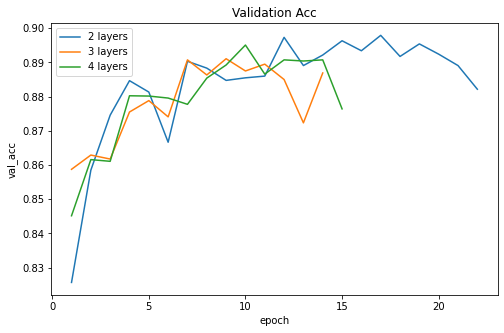

In [14]:
plt.rcParams["figure.figsize"] = (8, 5)
for index in range(len(history_lst)):
    acc = history_lst[index]["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{index + 2} layers")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Architecture: Number of units

In [19]:
arg_dict = [{0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            }, 
           {0: (256, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }, 
           {0: (128, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            },]
history_lst = list()
info_lst = ["512", "256", "128"]
for trial in range(3):
    his, _ = mlp_models(num_layers=2, arg_dict=arg_dict[trial], info=info_lst[trial])
    history_lst.append(his)

512
Test loss: 0.3538702428340912
Test accuracy: 0.8858000040054321
256
Test loss: 0.3302786648273468
Test accuracy: 0.8847000002861023
128
Test loss: 0.36588016152381897
Test accuracy: 0.8876000046730042


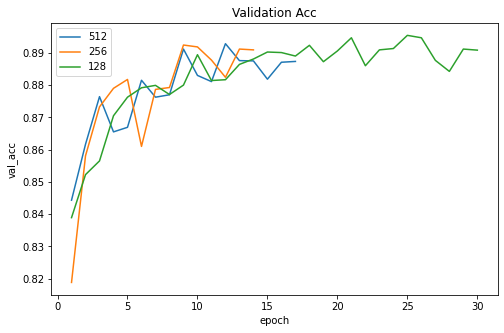

In [20]:
for index in range(len(history_lst)):
    acc = history_lst[index]["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Initializations / Activations / Optimizers / Regularizations

In [11]:
# No dropout
initialization_lst = [tf.keras.initializers.GlorotUniform(),
                      tf.keras.initializers.RandomNormal(mean=0., stddev=1.),
                      tf.keras.initializers.GlorotNormal(),
                     ]
initialization_info = ["glorot uniform", "random normal", "glorot normal"]
activation_lst = ["relu", "sigmoid", "tanh"]
optimizer_lst = [tf.keras.optimizers.RMSprop(),
                 tf.keras.optimizers.Adam(),
                 tf.keras.optimizers.Adam(learning_rate=0.01),
                 ]
optimizer_info = ["RMSprop", "adam default", "adam 0.01"]
regularization_lst = [regularizers.L1(l1=0.01), regularizers.L2(l2=0.01), None]
regularization_info = ["L1", "L2", "None"]

arg_dict = list()
for a in range(3):
    initialization = initialization_lst[a]
    for b in range(3):
        activation = activation_lst[b]
        for c in range(3):
            optimizer = optimizer_lst[c]
            for d in range(3):
                regularization = regularization_lst[d]
                info = " / ".join([initialization_info[a], activation_lst[b], optimizer_info[c], regularization_info[d]])
                arg_dict.append({0: (128, activation, initialization, regularization),
                                 1: (10, "softmax", initialization, None),
                                 "op": optimizer,
                                 "info": info},)
print(f"Parameter Settings: {len(arg_dict)}.")
print(f"Example: {arg_dict[0]}")

Parameter Settings: 81.
Example: {0: (128, 'relu', <keras.initializers.initializers_v2.GlorotUniform object at 0x7f502b5063d0>, <keras.regularizers.L1 object at 0x7f502b467b80>), 1: (10, 'softmax', <keras.initializers.initializers_v2.GlorotUniform object at 0x7f502b5063d0>, None), 'op': <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f502b4671c0>, 'info': 'glorot uniform / relu / RMSprop / L1'}


In [12]:
score_lst = list()
records = list()
for trial in range(len(arg_dict)):
    _, score = mlp_models(num_layers=2, arg_dict=arg_dict[trial], optimizer=arg_dict[trial]["op"], info=arg_dict[trial]["info"])
    records.append(arg_dict[trial]["info"])
    score_lst.append(score)

glorot uniform / relu / RMSprop / L1
Test loss: 1.3726140260696411
Test accuracy: 0.7714999914169312
glorot uniform / relu / RMSprop / L2
Test loss: 0.6088033318519592
Test accuracy: 0.8213000297546387
glorot uniform / relu / RMSprop / None
Test loss: 0.3491945266723633
Test accuracy: 0.8755999803543091
glorot uniform / relu / adam default / L1
Test loss: 0.9702183604240417
Test accuracy: 0.7858999967575073
glorot uniform / relu / adam default / L2
Test loss: 0.5215848684310913
Test accuracy: 0.8420000076293945
glorot uniform / relu / adam default / None
Test loss: 0.35733363032341003
Test accuracy: 0.8827000260353088
glorot uniform / relu / adam 0.01 / L1
Test loss: 2.304311513900757
Test accuracy: 0.7472000122070312
glorot uniform / relu / adam 0.01 / L2
Test loss: 0.7077142000198364
Test accuracy: 0.7990000247955322
glorot uniform / relu / adam 0.01 / None
Test loss: 0.4366047978401184
Test accuracy: 0.8478000164031982
glorot uniform / sigmoid / RMSprop / L1
Test loss: 1.66621112823

In [19]:
best = np.argmax(np.array(score_lst), axis=0)[1]
print(f"Best Settings: {records[best]}.")
print(f"Best acc: {score_lst[best][1]}.")

Best Settings: glorot uniform / sigmoid / RMSprop / None.
Best acc: 0.8888000249862671.


In [22]:
# With dropout
## Setting 1
dropout_r = [0.1, 0.3, 0.5]
arg_dict = {0: (128, "sigmoid", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }
info_lst = ["0.1", "0.3", "0.5"]
for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict, dropout=True, dropout_lst=dropout_r, info=info_lst[trial])

0.1
Test loss: 0.33404281735420227
Test accuracy: 0.8823999762535095
0.3
Test loss: 0.3318142592906952
Test accuracy: 0.883400022983551
0.5
Test loss: 0.32462039589881897
Test accuracy: 0.8871999979019165


In [24]:
## Setting 2
dropout_r = [0.1, 0.3, 0.5]
arg_dict = {0: (512, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }
info_lst = ["0.1", "0.3", "0.5"]
for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict, dropout=True, dropout_lst=dropout_r, info=info_lst[trial])

0.1
Test loss: 0.35022810101509094
Test accuracy: 0.8748999834060669
0.3
Test loss: 0.38686779141426086
Test accuracy: 0.8919000029563904
0.5
Test loss: 0.3649497628211975
Test accuracy: 0.887499988079071


In [25]:
## Setting 3
dropout_r = [0.1, 0.3, 0.5]
arg_dict = {0: (128, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }
info_lst = ["0.1", "0.3", "0.5"]
for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict, dropout=True, dropout_lst=dropout_r, info=info_lst[trial])

0.1
Test loss: 0.34795081615448
Test accuracy: 0.8891000151634216
0.3
Test loss: 0.35057082772254944
Test accuracy: 0.8833000063896179
0.5
Test loss: 0.3354928195476532
Test accuracy: 0.8844000101089478


### Fashion MNIST CNN

#### CNN: Baseline (Example in the textbook)

In [2]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
model = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
375/375 [==============================] - 7s 16ms/step - loss: 0.2720 - accuracy: 0.9116 - val_loss: 0.2696 - val_accuracy: 0.9054
Epoch 2/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2561 - accuracy: 0.9172 - val_loss: 0.3072 - val_accuracy: 0.9113
Epoch 3/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2519 - accuracy: 0.9180 - val_loss: 0.2757 - val_accuracy: 0.9093
Epoch 4/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2480 - accuracy: 0.9199 - val_loss: 0.3042 - val_accuracy: 0.9050
Epoch 5/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2508 - accuracy: 0.9205 - val_loss: 0.2742 - val_accuracy: 0.9133
Epoch 6/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2428 - accuracy: 0.9206 - val_loss: 0.2810 - val_accuracy: 0.9142
Epoch 7/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2450 - accuracy: 0.9215 - val_loss: 0.2821 - val_accuracy: 0.9122

#### Experiments with CNN network

##### Architecture: Adding / removing layers

In [6]:
batch_size = 128
epochs = 50

model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="./temp.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_callback1 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

model1 = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback1, early_callback1])
model1.load_weights("./temp.hdf5")
score = model1.evaluate(x_test, y_test, verbose=0)
print('Baseline')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Remove layers
model2 = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="./temp.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_callback2 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback2, early_callback2])
model2.load_weights("./temp.hdf5")
score = model2.evaluate(x_test, y_test, verbose=0)
print('Remove layers')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Add layers
model3 = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.Conv2D(64, 7, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model_checkpoint_callback3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="./temp.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_callback3 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

model3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history3 = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback3, early_callback3])
model3.load_weights("./temp.hdf5")
score = model3.evaluate(x_test, y_test, verbose=0)
print('Add layers')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Baseline
Test loss: 0.2642196714878082
Test accuracy: 0.9108999967575073
Remove layers
Test loss: 0.33600562810897827
Test accuracy: 0.910099983215332
Add layers
Test loss: 0.31048905849456787
Test accuracy: 0.906000018119812


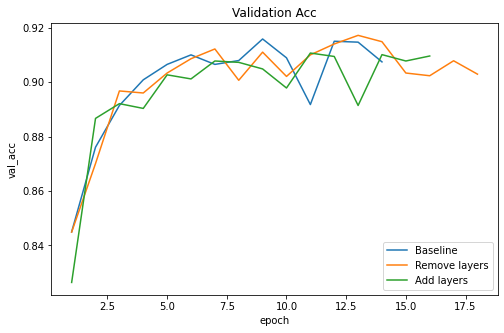

In [9]:
plt.rcParams["figure.figsize"] = (8, 5)
history_lst = [history1.history, history2.history, history3.history]
info_lst = ["Baseline", "Remove layers", "Add layers"]

for index in range(len(history_lst)):
    acc = history_lst[index]["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Architecture: Number of filters

In [15]:
def cnn_models(filter_set=(64, 128, 256), dropout_set=(0.5, 0.5), optimizer=RMSprop(), info=""):
    print(info)
    K.clear_session()
    model = keras.models.Sequential([ 
      keras.layers.Conv2D(filter_set[0], 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
      keras.layers.MaxPooling2D(2),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
      keras.layers.Dense(128, activation="relu"), 
      keras.layers.Dropout(dropout_set[0]), 
      keras.layers.Dense(64, activation="relu"), 
      keras.layers.Dropout(dropout_set[1]),
      keras.layers.Dense(10, activation="softmax") 
    ])
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath="./temp.hdf5",
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True
    )

    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history, score

In [16]:
filters = [(64, 128, 256), (32, 64, 128), (128, 256, 512)]
history_lst = list()
info_lst = ["(64, 128, 128, 256, 256)", "(32, 64, 64, 128, 128)", "(128, 256, 256, 512, 512)"]
for trial in range(3):
    his, _ = cnn_models(filter_set=filters[trial], info=info_lst[trial])
    history_lst.append(his)

(64, 128, 128, 256, 256)
Test loss: 0.27673131227493286
Test accuracy: 0.9093999862670898
(32, 64, 64, 128, 128)
Test loss: 0.2916443347930908
Test accuracy: 0.9093999862670898
(128, 256, 256, 512, 512)
Test loss: 0.2906615436077118
Test accuracy: 0.90420001745224


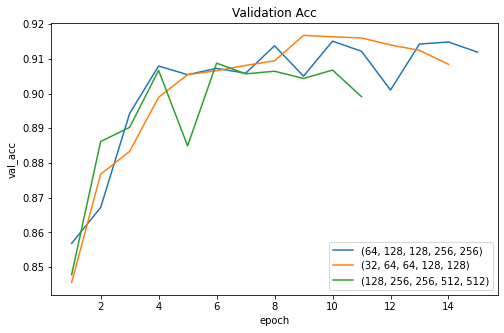

In [18]:
plt.rcParams["figure.figsize"] = (8, 5)
for index in range(len(history_lst)):
    acc = history_lst[index].history["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Regularizations

In [19]:
# Dropout rate
dropout_r = [(0.5, 0.5), (0.3, 0.3), (0.1, 0.1)]
history_lst = list()
info_lst = ["(0.5, 0.5)", "(0.3, 0.3)", "(0.1, 0.1)"]
for trial in range(3):
    his, _ = cnn_models(filter_set=(32, 64, 128), dropout_set=dropout_r[trial], info=info_lst[trial])
    history_lst.append(his)

(0.5, 0.5)
Test loss: 0.37126895785331726
Test accuracy: 0.9104999899864197
(0.3, 0.3)
Test loss: 0.36127129197120667
Test accuracy: 0.9175000190734863
(0.1, 0.1)
Test loss: 0.3278583884239197
Test accuracy: 0.9182999730110168


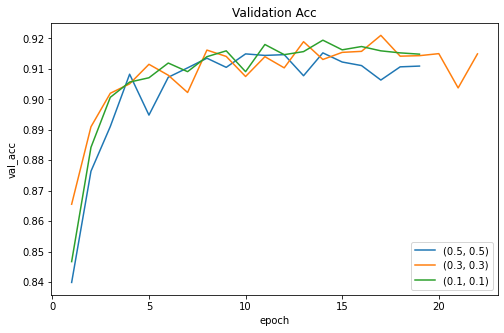

In [20]:
for index in range(len(history_lst)):
    acc = history_lst[index].history["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

In [22]:
optimizer_lst = [tf.keras.optimizers.RMSprop(),
                 tf.keras.optimizers.Adam(),
                 tf.keras.optimizers.Adam(learning_rate=0.01),
                 ]
info_lst = ["RMSprop", "adam default", "adam 0.01"]
history_lst = list()
for trial in range(3):
    his, _ = cnn_models(filter_set=(32, 64, 128), dropout_set=(0.1, 0.1), optimizer=optimizer_lst[trial], info=info_lst[trial])
    history_lst.append(his)

RMSprop
Test loss: 0.2767595052719116
Test accuracy: 0.9110999703407288
adam default
Test loss: 0.40711092948913574
Test accuracy: 0.9115999937057495
adam 0.01
Test loss: 0.3657534122467041
Test accuracy: 0.873199999332428


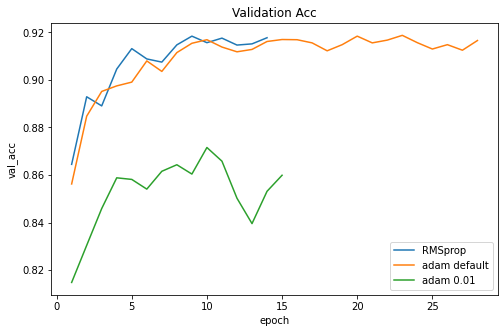

In [23]:
for index in range(len(history_lst)):
    acc = history_lst[index].history["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

#### Top three hyperparameter settings

**MLP**

1. Test acc: 0.892. Two layers, units: (512, 10), activations: "relu", initializations: "glorot_uniform", optimizer: RMSprop, Dropout: 0.3.

2. Test acc: 0.891. Two layers, units: (512, 10), activations: "relu", initializations: "glorot_uniform", optimizer: RMSprop, Dropout: None.

3. Test acc: 0.889. Two layers, units: (128, 10), activations: "relu", initializations: "glorot_uniform", optimizer: RMSprop, Dropout: 0.1.

**CNN**

1. Test acc: 0.918. filters: (32, 64, 64, 128, 128), optimizer: RMSprop, Dropout: (0.1, 0.1).

2. Test acc: 0.912. filters: (32, 64, 64, 128, 128), optimizer: Adam, Dropout: (0.1, 0.1).

3. Test acc: 0.909. filters: (32, 64, 64, 128, 128), optimizer: RMSprop, Dropout: (0.5, 0.5).

### CIFAR-10 MLP

#### MLP: Baseline (Example in the textbook)

In [2]:
batch_size = 128
num_classes = 10
epochs = 30

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train = x_train.reshape(50000, -1)
x_test = x_test.reshape(10000, -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[3072,]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               921900    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
391/391 [==============================] - 3s 6ms/step - loss: 2.1377 - accuracy: 0.2588 - val_loss: 1.8423 - val_accuracy: 0.3465
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 1.8010 - accuracy: 0.3554 - val_loss: 1.7151 - val_accuracy: 0.3801
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 1.7085 - accuracy: 0.3878 - val_loss: 1.6184 - val_accuracy: 0.4248
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6420 - accuracy: 0.4150 - val_loss: 1.6745 - val_accuracy: 0.4115
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5967 - accuracy: 0.4316 - val_loss: 1.5507 - val_accuracy: 0.4498
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5573 - accuracy: 0.4451 - val_loss: 1.5546 - val_accuracy: 0.4417
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5312 - accuracy: 0.4582 - val_loss: 1.4891 - val_accuracy: 0.4737
Epoch 

#### Experiments with MLP network

In [12]:
def mlp_models(num_layers=3, arg_dict=arg_dict, dropout=False, dropout_lst=[], optimizer=RMSprop(), batch=128, info=""):
    K.clear_session()
    print(f"{info}")
    model = keras.models.Sequential()
    model.add(Input(shape=(3072,)))
    for i in range(num_layers):
        model.add(Dense(arg_dict[i][0], 
                     activation=arg_dict[i][1], 
                     kernel_initializer=arg_dict[i][2], 
                     kernel_regularizer=arg_dict[i][3]))
        if dropout and i != (num_layers - 1):
            model.add(Dropout(dropout_lst[i]))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])   
    
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath="./temp.hdf5",
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    
    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
    
    history = model.fit(x_train, y_train,
                    batch_size=batch,
                    epochs=50,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0) 
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history.history, score

##### Top three settings in Fashion MNIST

In [13]:
arg_dict = [{0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            },
            {0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            },
            {0: (128, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            },
           ]
dropout_lst = [0.3, None, 0.1]
info_lst = ["Top 1", "Top 2", "Top 3"]

for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict[trial], dropout=dropout_lst[trial], dropout_lst=[dropout_lst[trial]], 
               optimizer=RMSprop(), batch=128, info=info_lst[trial])

Top 1
Test loss: 1.5320674180984497
Test accuracy: 0.45590001344680786
Top 2
Test loss: 1.4959994554519653
Test accuracy: 0.47350001335144043
Top 3
Test loss: 1.5920538902282715
Test accuracy: 0.430400013923645


##### New model: Best settings

In [16]:
arg_dict = {0: (512, "relu", "glorot_uniform", None),
            1: (128, "relu", "glorot_uniform", None),
            2: (32, "relu", "glorot_uniform", None),
            3: (10, "softmax", "glorot_uniform", None),
            }
_x, _y = mlp_models(num_layers=4, arg_dict=arg_dict, dropout=True, dropout_lst=[0.1, 0.1, 0.1], optimizer=RMSprop(), batch=128, info="Best model")

Best model
Test loss: 1.4300379753112793
Test accuracy: 0.4984999895095825


### CIFAR-10 CNN

#### CNN: Baseline (Example in the textbook)

In [3]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
model = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[32, 32, 3]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 256)        

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
391/391 [==============================] - 9s 21ms/step - loss: 1.9602 - accuracy: 0.2721 - val_loss: 1.6550 - val_accuracy: 0.4039
Epoch 2/30
391/391 [==============================] - 7s 19ms/step - loss: 1.6507 - accuracy: 0.4040 - val_loss: 1.3697 - val_accuracy: 0.5068
Epoch 3/30
391/391 [==============================] - 7s 19ms/step - loss: 1.4472 - accuracy: 0.4916 - val_loss: 1.2728 - val_accuracy: 0.5440
Epoch 4/30
391/391 [==============================] - 7s 19ms/step - loss: 1.2858 - accuracy: 0.5533 - val_loss: 1.2393 - val_accuracy: 0.5699
Epoch 5/30
391/391 [==============================] - 8s 19ms/step - loss: 1.1543 - accuracy: 0.6071 - val_loss: 1.0342 - val_accuracy: 0.6490
Epoch 6/30
391/391 [==============================] - 7s 19ms/step - loss: 1.0417 - accuracy: 0.6524 - val_loss: 0.9616 - val_accuracy: 0.6756
Epoch 7/30
391/391 [==============================] - 8s 19ms/step - loss: 0.9627 - accuracy: 0.6822 - val_loss: 1.1122 - val_accuracy: 0.6502

#### Experiments with CNN network

In [9]:
def cnn_models(filter_set=(32, 64, 128), dropout_set=(0.1, 0.1), optimizer=RMSprop(), info=""):
    print(info)
    K.clear_session()
    model = keras.models.Sequential([ 
      keras.layers.Conv2D(filter_set[0], 7, activation="relu", padding="same", input_shape=[32, 32, 3]),
      keras.layers.MaxPooling2D(2),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
      keras.layers.Dense(128, activation="relu"), 
      keras.layers.Dropout(dropout_set[0]), 
      keras.layers.Dense(64, activation="relu"), 
      keras.layers.Dropout(dropout_set[1]),
      keras.layers.Dense(10, activation="softmax") 
    ])
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath="./temp.hdf5",
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True
    )

    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history, score

##### Top three settings in Fashion MNIST

In [10]:
_x, _y = cnn_models(info="Top 1")
_x, _y = cnn_models(optimizer=tf.keras.optimizers.Adam(), info="Top 2")
_x, _y = cnn_models(dropout_set=(0.5, 0.5), info="Top 3")

Top 1
Test loss: 0.9998464584350586
Test accuracy: 0.6969000101089478
Top 2
Test loss: 1.0245908498764038
Test accuracy: 0.7003999948501587
Top 3
Test loss: 0.9958972930908203
Test accuracy: 0.6801999807357788


##### New model: Best settings

In [12]:
_x, _y = cnn_models(filter_set=(64, 128, 256), dropout_set=(0.1, 0.1), optimizer=tf.keras.optimizers.Adam(), info="Best model")

Best model
Test loss: 1.189468502998352
Test accuracy: 0.7024000287055969
